In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('job17.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,3920,city_106,0.698,Male,Has relevent experience,no_enrollment,Graduate,STEM,18,10000+,Pvt Ltd,4,39,0
1,29841,city_21,0.624,NaN,No relevent experience,Full time course,High School,NaN,<1,NaN,NaN,never,56,1
2,16289,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,3,50-99,NaN,1,82,1
3,19889,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,7,10000+,Pvt Ltd,2,32,0
4,11780,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,43,1


In [3]:
df=df.drop(['enrollee_id', 'city', 'major_discipline','company_size' ,'company_type', 'training_hours', 'city_development_index'], axis=1)
df.head()

,gender,relevent_experience,enrolled_university,education_level,experience,last_new_job,target
0,Male,Has relevent experience,no_enrollment,Graduate,18,4,0
1,NaN,No relevent experience,Full time course,High School,<1,never,1
2,NaN,Has relevent experience,no_enrollment,Graduate,3,1,1
3,NaN,Has relevent experience,no_enrollment,Graduate,7,2,0
4,Male,Has relevent experience,no_enrollment,Graduate,>20,1,1


In [4]:
df.isnull().sum()

gender                 4221
relevent_experience       0
enrolled_university     352
education_level         429
experience               61
last_new_job            402
target                    0
dtype: int64

In [5]:
df['gender'].value_counts()

Male      12392
Female     1157
Other       180
Name: gender, dtype: int64

In [6]:
df['enrolled_university'].value_counts()

no_enrollment       12950
Full time course     3528
Part time course     1120
Name: enrolled_university, dtype: int64

In [8]:
df['education_level'].value_counts()

Graduate          10850
Masters            4102
High School        1893
Phd                 390
Primary School      286
Name: education_level, dtype: int64

In [9]:
df['experience'].value_counts()

>20    3080
5      1337
4      1319
3      1269
6      1138
2      1040
7       970
10      929
9       913
8       748
15      641
11      621
14      546
1       519
<1      488
16      485
12      465
13      377
17      323
19      284
18      262
20      135
Name: experience, dtype: int64

In [10]:
df['last_new_job'].value_counts()

1        7541
>4       3074
2        2710
never    2290
4         970
3         963
Name: last_new_job, dtype: int64

In [13]:
df['gender']=df['gender'].fillna('Male')
df['enrolled_university']=df['enrolled_university'].fillna('no_enrollment')
df['education_level']=df['education_level'].fillna('Graduate')
df['experience']=df['experience'].fillna('>20')
df['last_new_job']=df['last_new_job'].fillna('1')
df.isnull().sum()

gender                 0
relevent_experience    0
enrolled_university    0
education_level        0
experience             0
last_new_job           0
target                 0
dtype: int64

In [14]:
df.replace('<1', '0', inplace=True)
df.replace('>20', '22', inplace=True)
df['experience']=df['experience'].astype('int64')
df.dtypes

gender                 object
relevent_experience    object
enrolled_university    object
education_level        object
experience              int64
last_new_job           object
target                  int64
dtype: object

In [15]:
df['gender']=df['gender'].map({'Male':1, 'Female':2, 'Other':3})
df['gender']=df['gender'].astype('int64')
df['gender'].value_counts()

1    16613
2     1157
3      180
Name: gender, dtype: int64

In [16]:
df.replace('>4', '5',inplace=True)
df.replace('never', '0', inplace=True)
df['last_new_job']=df['last_new_job'].astype('int64')
df.dtypes

gender                  int64
relevent_experience    object
enrolled_university    object
education_level        object
experience              int64
last_new_job            int64
target                  int64
dtype: object

<Axes: xlabel='gender', ylabel='count'>

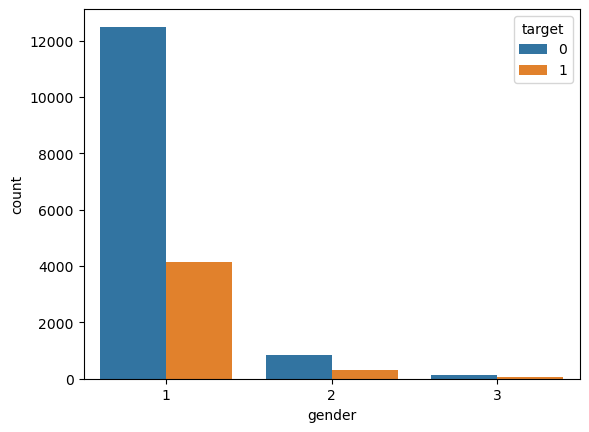

In [17]:
sns.countplot(x='gender', hue='target', data=df)

<Axes: xlabel='experience', ylabel='count'>

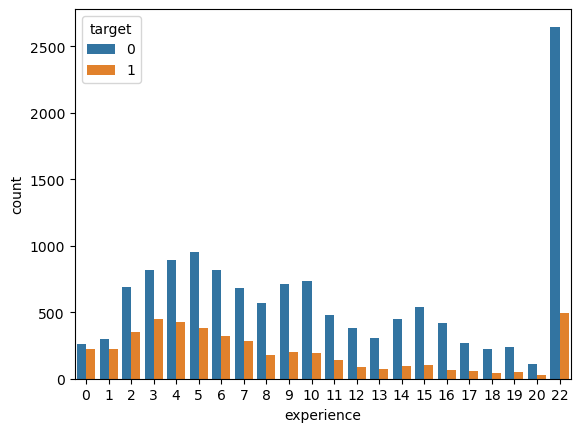

In [18]:
sns.countplot(x='experience', hue='target', data=df)

<Axes: xlabel='last_new_job', ylabel='count'>

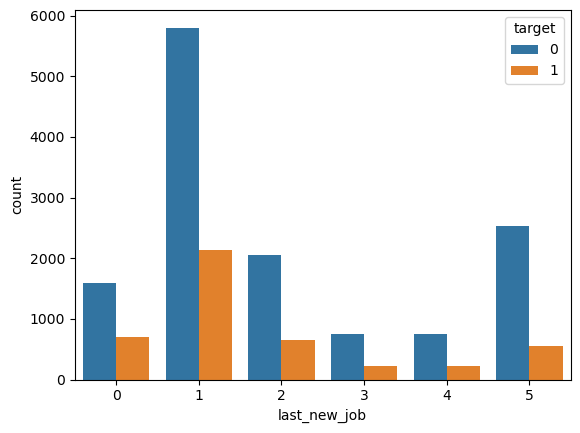

In [19]:
sns.countplot(x='last_new_job', hue='target', data=df)

<Axes: xlabel='relevent_experience', ylabel='count'>

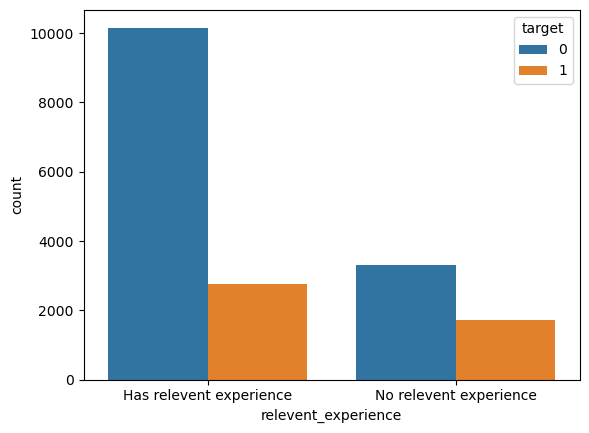

In [21]:
sns.countplot(x='relevent_experience', hue='target', data=df)

<Axes: xlabel='enrolled_university', ylabel='count'>

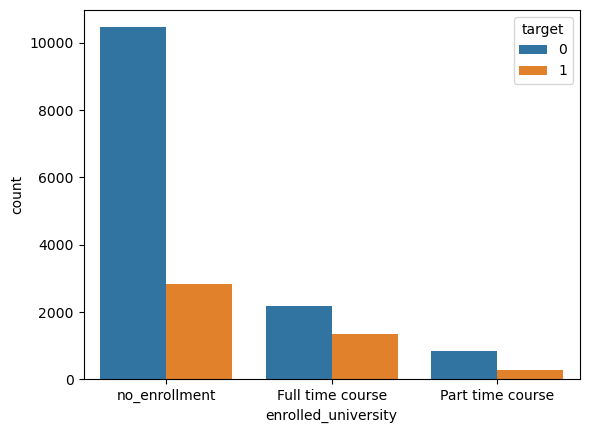

In [22]:
sns.countplot(x='enrolled_university', hue='target', data=df)

<Axes: xlabel='education_level', ylabel='count'>

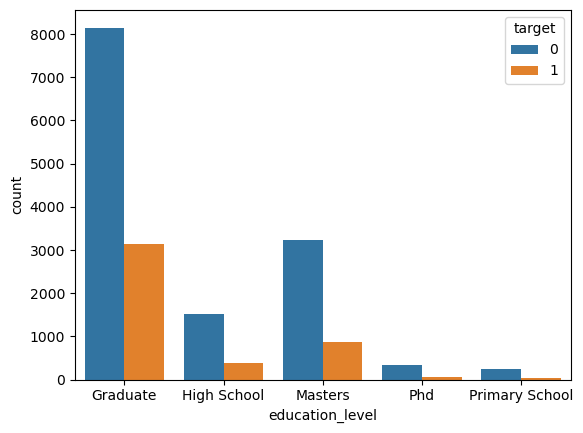

In [23]:
sns.countplot(x='education_level', hue='target', data=df)

<Axes: xlabel='experience', ylabel='count'>

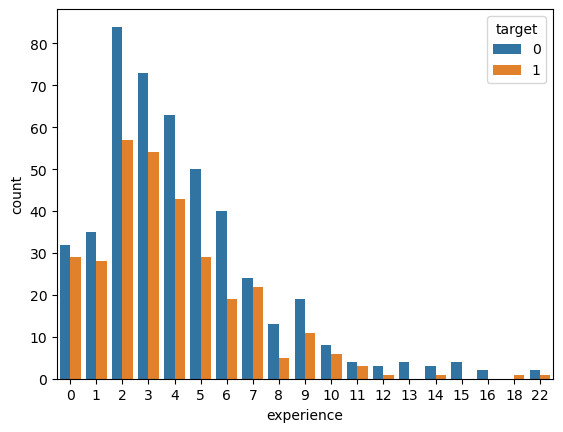

In [24]:
mdata = df.loc[df.gender==1, ['experience', 'last_new_job','relevent_experience','enrolled_university','target']]
olast = mdata.loc[mdata.last_new_job==0, ['experience','relevent_experience','enrolled_university','target']]
orele = olast.loc[olast.relevent_experience=='No relevent experience', ['experience','enrolled_university','target']]
oenrol = orele.loc[orele.enrolled_university=='Full time course', ['experience','target']]
sns.countplot(x='experience', hue='target', data=oenrol)